In [221]:
import numpy as np
import cv2
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
from pathlib import Path
import sys
import matplotlib.pyplot as plt
sys.path.append('/home/ahmad/projects/utils/')
from custom_widgets import Browser

In [222]:
colormap = cv2.COLORMAP_TURBO
browser = Browser(parent_path='/data_sp/intercam/drd_behavior')
browser.show()

In [223]:
parent_dir = Path(browser.path_textbox.value)
avi_filepaths = parent_dir.glob('*.avi')

In [18]:
parent_path = Path(browser.path_textbox.value)
txt_filepaths = list(parent_path.glob('*.txt'))
for i in txt_filepaths:
    print(i)

/data_sp/intercam/drd_behavior/m41(0)/none/none/drd_behavior_m41(0)_none_none_v2_300_300_12_20240424090035-845374/Lucid Vision Labs-HTP003S-001-240200702.txt
/data_sp/intercam/drd_behavior/m41(0)/none/none/drd_behavior_m41(0)_none_none_v2_300_300_12_20240424090035-845374/FLIR-1E10011883A9-011883A9.txt
/data_sp/intercam/drd_behavior/m41(0)/none/none/drd_behavior_m41(0)_none_none_v2_300_300_12_20240424090035-845374/FLIR-1E10011883A3-011883A3.txt
/data_sp/intercam/drd_behavior/m41(0)/none/none/drd_behavior_m41(0)_none_none_v2_300_300_12_20240424090035-845374/use_input_ts.txt


In [14]:
ts = [pd.read_csv(x.as_posix(), delimiter='\t') for x in txt_filepaths]

In [15]:
ts[0]

,frame_id,device_timestamp,system_timestamp,Unnamed: 3
0,1,661358437685272,1713963697558779000,NaN
1,2,661358470984312,1713963697703715000,NaN
2,6,661358604171992,1713963697725063000,NaN
3,7,661358637462552,1713963697758520000,NaN
4,8,661358670761592,1713963697791677000,NaN
...,...,...,...,...
18011,18015,661958237530872,1713964297358346000,NaN
18012,18016,661958270829912,1713964297391660000,NaN
18013,18017,661958304120472,1713964297424989000,NaN
18014,18018,661958337419512,1713964297458254000,NaN


In [210]:
system_ts = [x['system_timestamp'].T / 1e6 for x in ts[:3]]
df = pd.DataFrame(system_ts)

In [213]:
df_subtracted = df.subtract(df.iloc[2])

In [214]:
df_subtracted

,0,1,2,3,4,5,6,7,8,9,...,18009,18010,18011,18012,18013,18014,18015,18016,18017,18018
system_timestamp,NaN,NaN,NaN,-145.502197,-1.336914,4.289062,1.685059,4.325928,4.332031,4.351318,...,4.331055,4.51709,4.364014,4.368896,4.375977,4.324707,4.336914,4.371094,4.341064,4.304932
system_timestamp,0.030762,0.003906,0.034912,-0.240967,-0.572998,-0.006836,4.197998,0.004883,0.000977,0.000000,...,-0.018799,0.01001,0.000977,0.014160,0.000000,0.047852,0.000000,0.008057,0.000000,0.000000
system_timestamp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [191]:
x = np.abs(df_subtracted.iloc[1]).sum()
print(x)

111.104736328125


In [187]:
delays.append(x)

In [188]:
delays

[1877809.2006835938,
 1278000.3771972656,
 678367.3801269531,
 78586.59399414062,
 521494.3342285156]

In [215]:
import matplotlib.pyplot as plt

(0.0, 10.0)

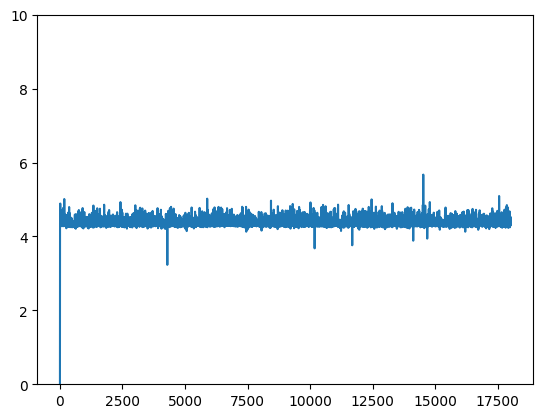

In [217]:

plt.plot(df_subtracted.iloc[0].values)
plt.ylim([0,10])